In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-in-the-dat/sample_submission.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/test.csv


In [2]:
import pandas as pd

data_path = "/kaggle/input/cat-in-the-dat/"

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

# Data analysis

In [3]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [4]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [5]:
submission.head(), submission.shape

(        target
 id            
 300000     0.5
 300001     0.5
 300002     0.5
 300003     0.5
 300004     0.5,
 (200000, 1))

In [6]:
df = train
df.dtypes

bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

In [7]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['dataType'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'feature'})
    summary['nMissingValues'] = df.isnull().sum().values
    summary['nUniqueValues'] = df.nunique().values
    summary['firstEntry'] = df.loc[0].values
    summary['secondEntry'] = df.loc[1].values
    summary['thirdEntry'] = df.loc[2].values
    
    return summary

resumetable(train)

데이터셋 형상: (300000, 24)


,feature,dataType,nMissingValues,nUniqueValues,firstEntry,secondEntry,thirdEntry
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [8]:
# ordinary data 0~2
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [9]:
# ordinary data 3~5
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [10]:
# Cyclic data
print(f'day 고윳값: {train["day"].unique()}')
print(f'month 고윳값: {train["month"].unique()}')

# target
print(f'target 고윳값: {train["target"].unique()}')

day 고윳값: [2 7 5 4 3 1 6]
month 고윳값: [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값: [0 1]


# Data analysis
## Visualization

In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

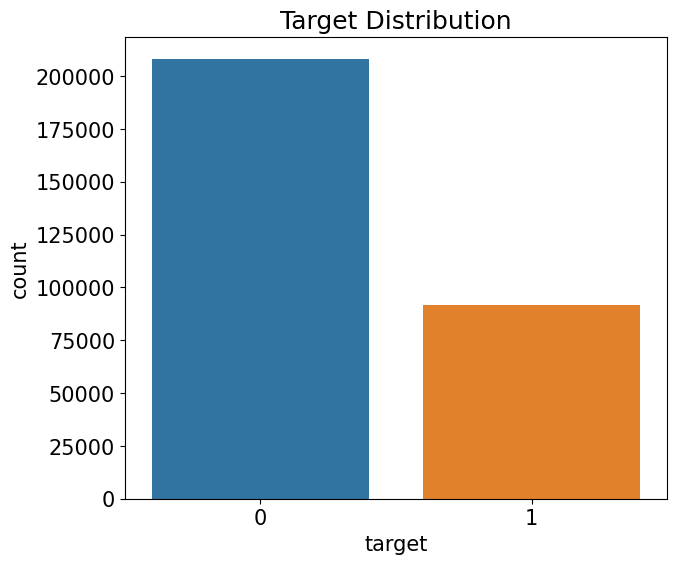

In [12]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')

In [13]:
ax.patches[0]

In [14]:
rectangle = ax.patches[0]
rectangle.get_height(), rectangle.get_width(), rectangle.get_x()

(208236.0, 0.8, -0.4)

def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
    
ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution)

Text(0.5, 1.0, 'Target Distribution')

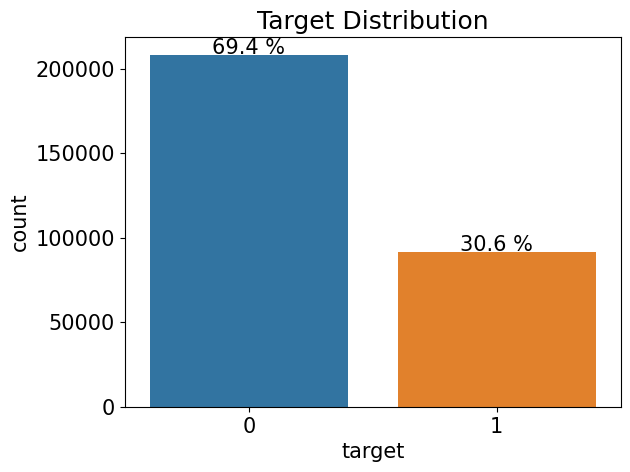

In [15]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        # (x, y) 좌표에 text 입력
        ax.text(x=left_coord + width/2,
               y=height + total_size*0.001,
               s=f'{percent:1.1f} %',
               ha='center')
    
ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

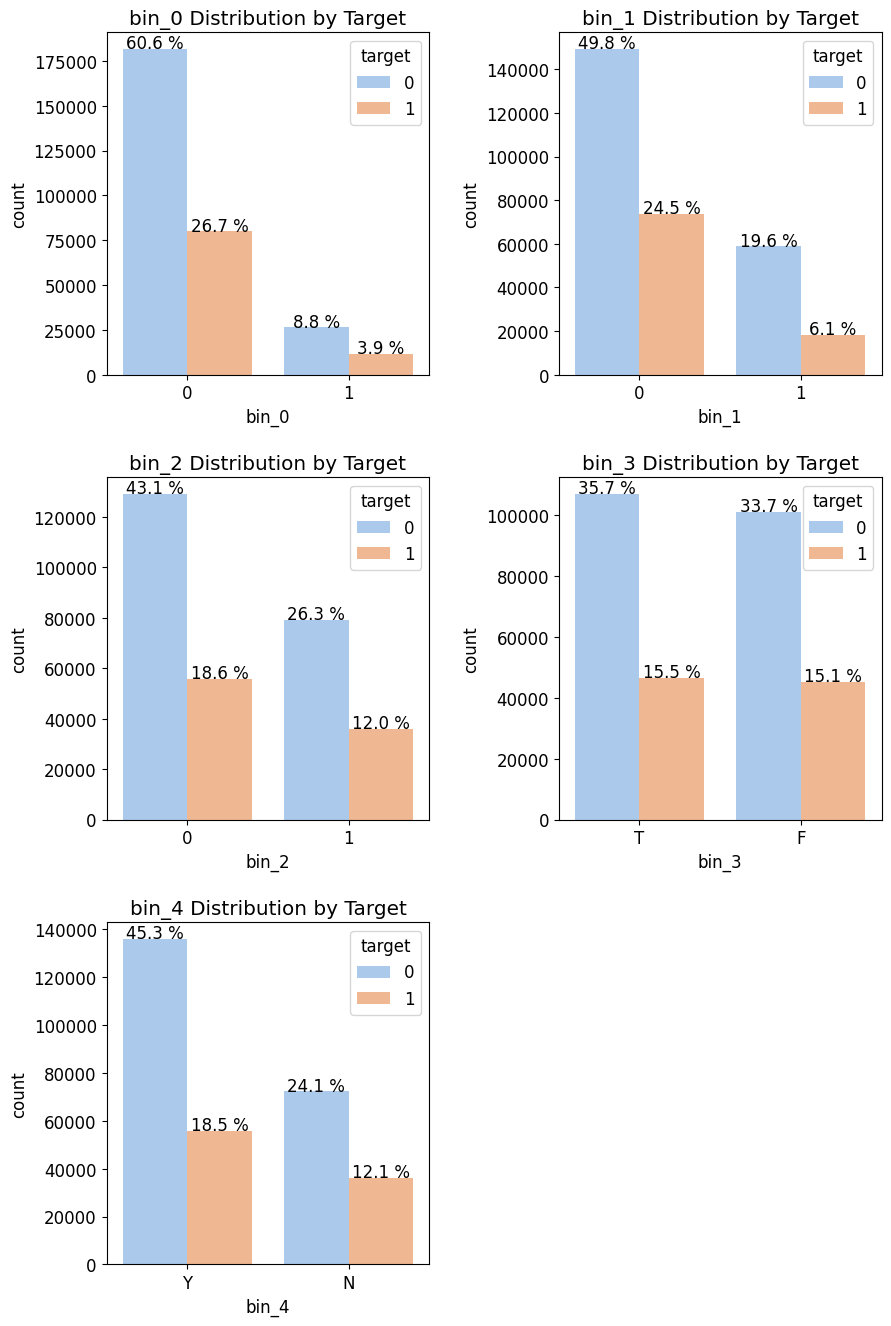

In [16]:
# binary data distribution by target
import matplotlib.gridspec as gridspec

mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2)
plt.figure(figsize=(10, 16))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

bin_features = ['bin_' + str(n) for n in range(5)]

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,
                 data=train,
                 hue='target',
                 palette='pastel',
                 ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

In [17]:
# Nominal Data

crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
# crosstab = crosstab.reset_index()
print(crosstab.columns)
crosstab

Index([0, 1], dtype='int64', name='target')


target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [18]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], train['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab
    
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


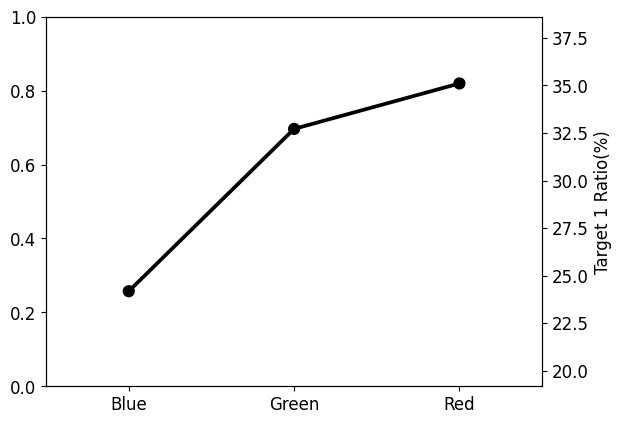

In [19]:
def plot_pointplot(ax, feature, crosstab, y=1):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=feature, 
                       y=y,
                       data=crosstab,
                       order=crosstab[feature].values,
                       color='black')
    
    ax2.set_ylim(crosstab[y].min()-5, crosstab[y].max()*1.1)
    ax2.set_ylabel(f'Target {y} Ratio(%)')
    
ax = plt.subplot()
plot_pointplot(ax, 'nom_0', crosstab)

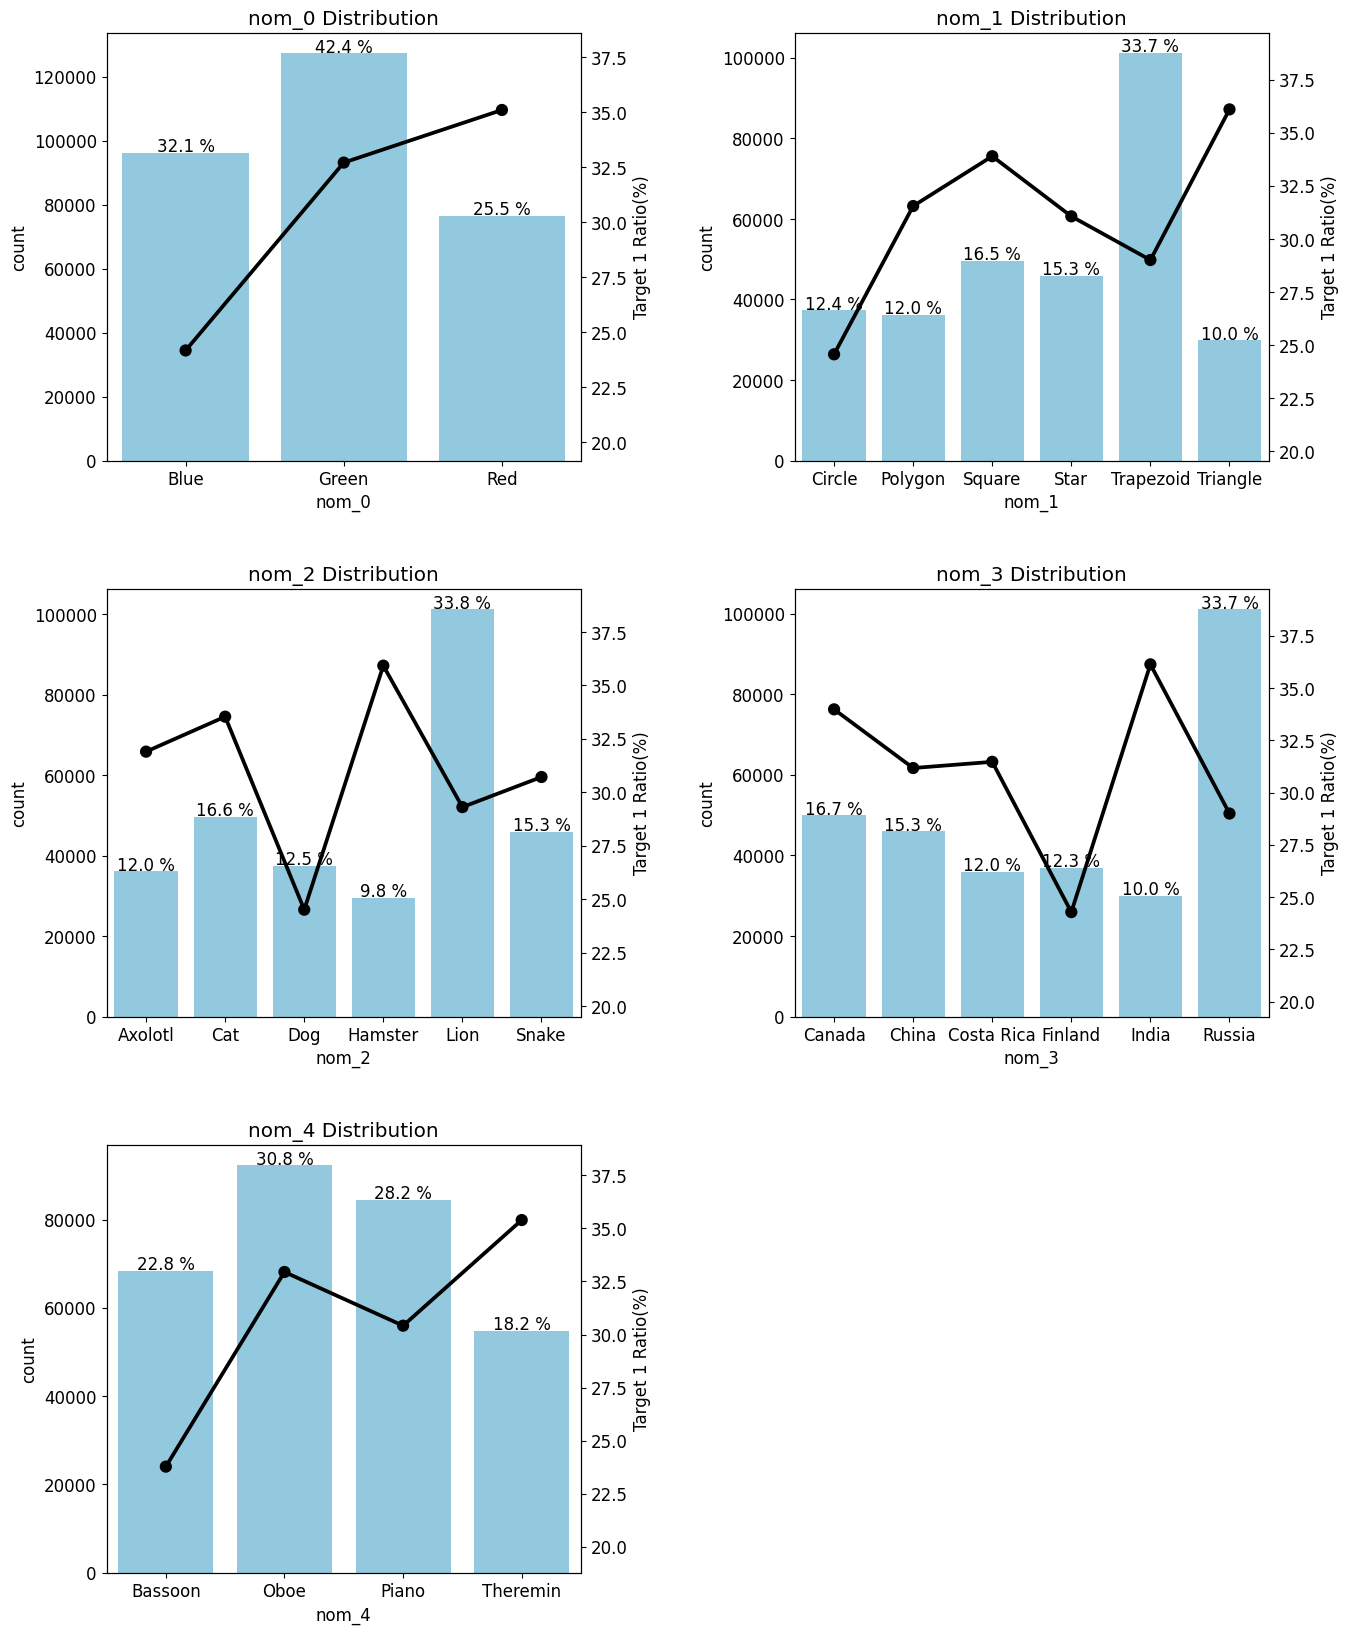

In [20]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                 size=(15, 20)):
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        
        sns.countplot(x=feature, data=df,
                     order=crosstab[feature].values,
                     color='skyblue',
                     ax=ax)
        
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab)
        ax.set_title(f'{feature} Distribution')
        
nom_features = ['nom_' + str(i) for i in range(5)]
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

In [21]:
# Ordinary data

from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', "Lava Hot"]

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

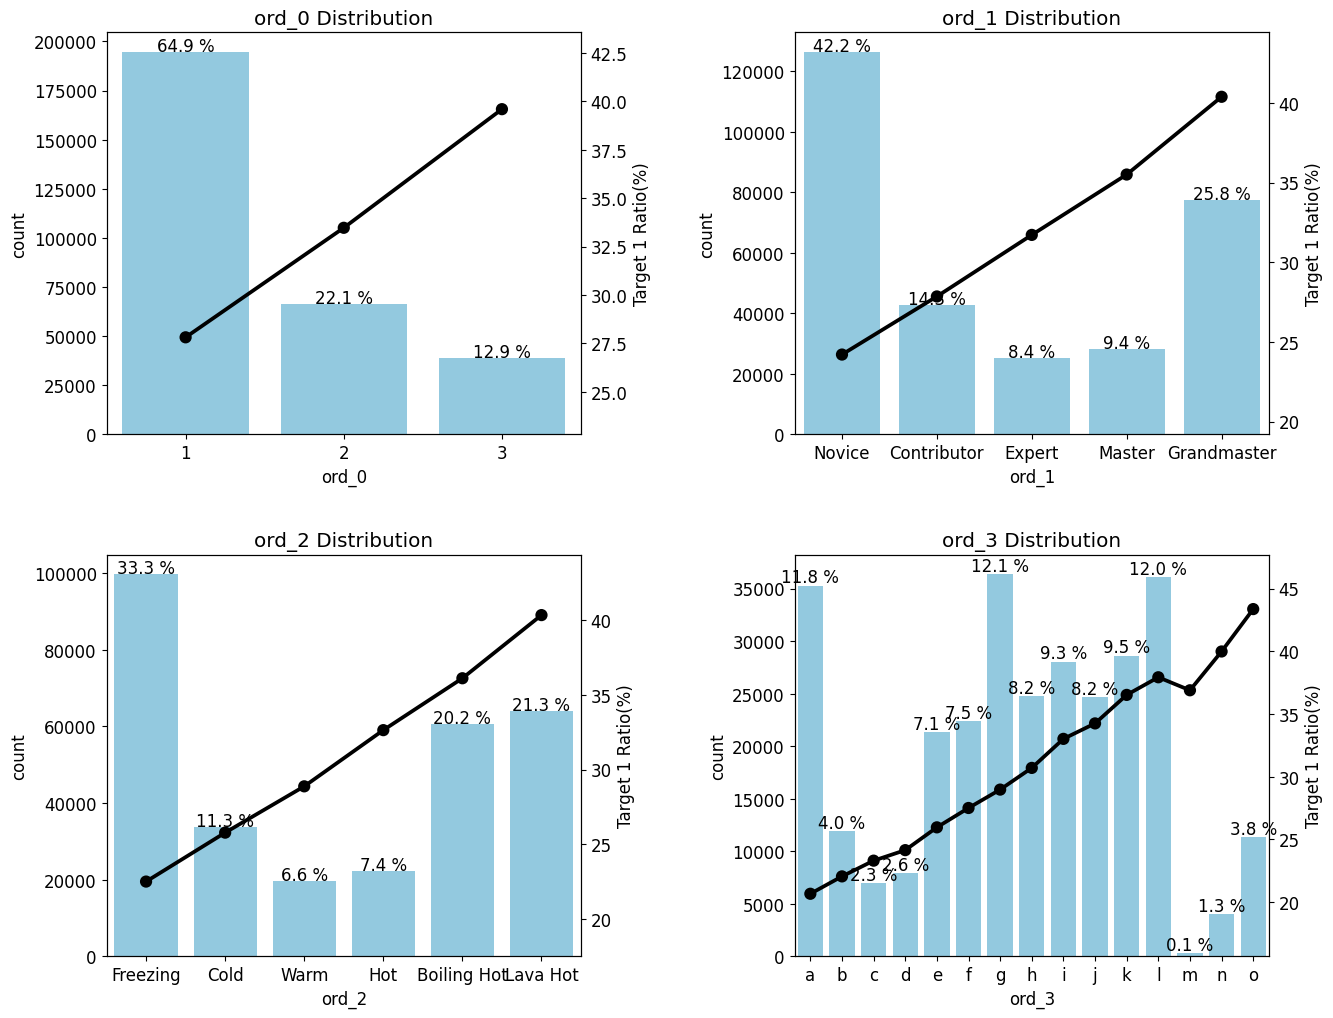

In [22]:
ord_features = ['ord_' + str(i) for i in range(4)]
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

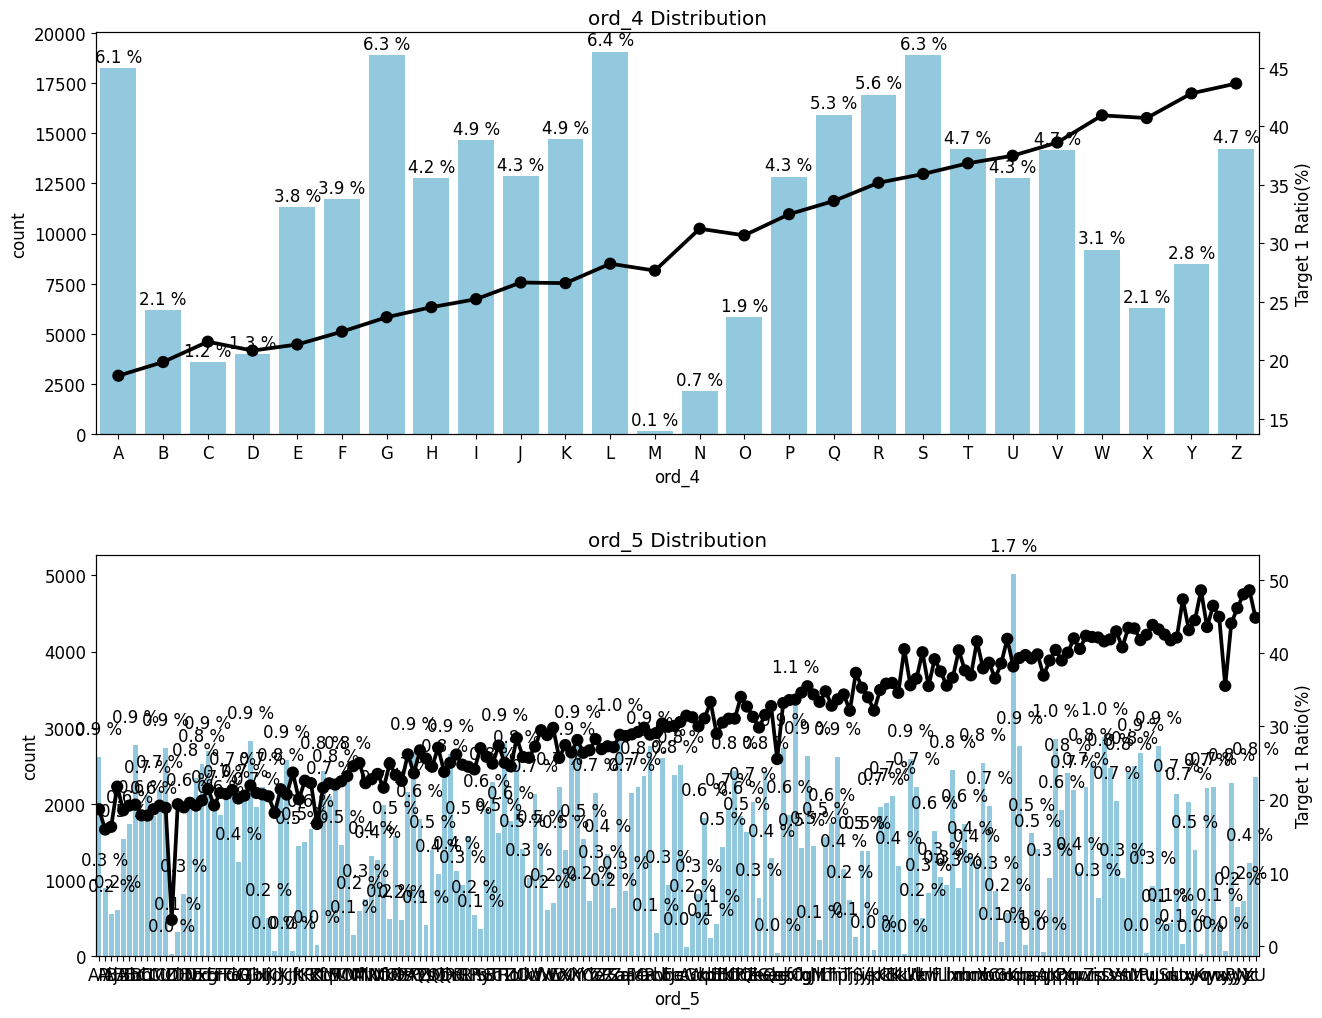

In [23]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], num_rows=2, num_cols=1, size=(15,12))

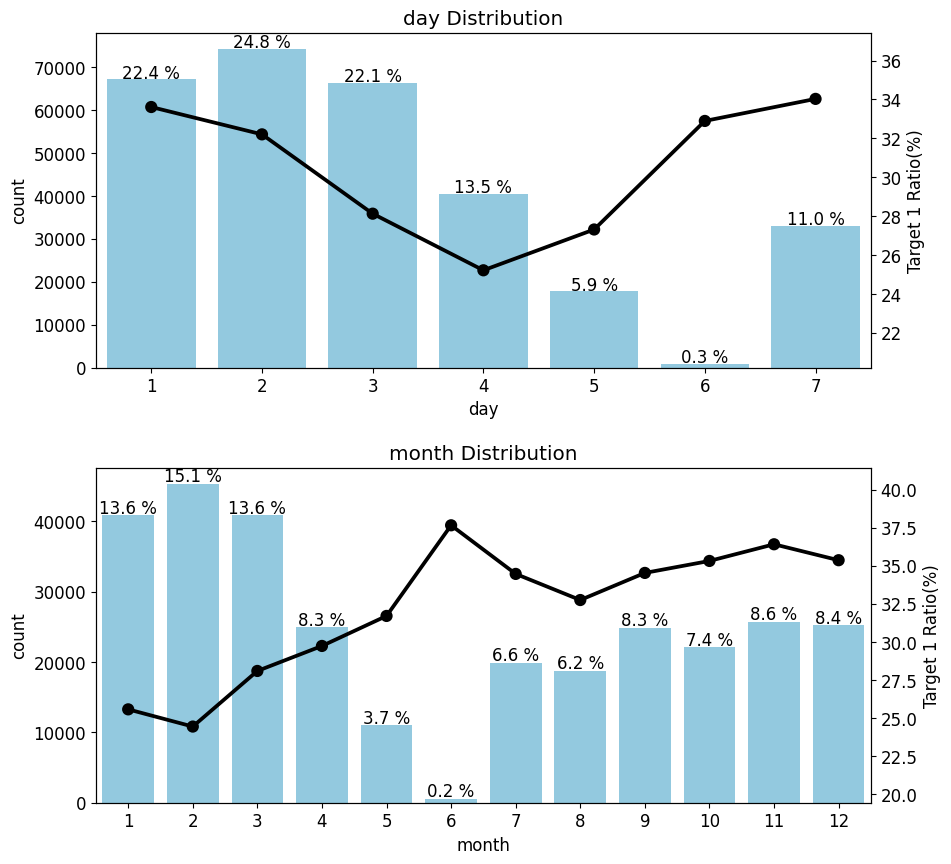

In [24]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows=2, num_cols=1, size=(10,10))